In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%run main.ipynb

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)
dataSet = main()

print(dataSet)

      gender  seniorCitizen partner dependents  tenure phoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         multipleLines internetService onlineSecurity onlineBackup  \
0     No phone service             DSL             No          Yes   
1      

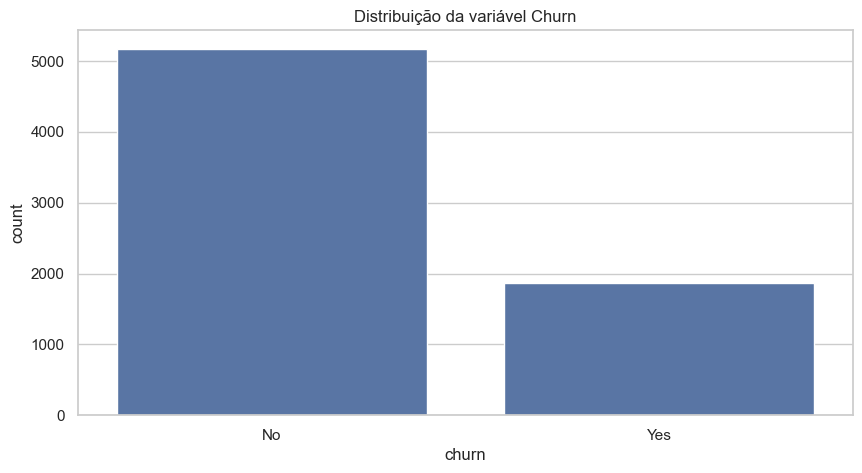

In [10]:
plt.figure()
sns.countplot(x='churn', data=dataSet)
plt.title('Distribuição da variável Churn')
plt.show()

In [11]:
churn_rate = dataSet['churn'].value_counts(normalize=True)
print("\n📊 Proporção de Churn:")
print(churn_rate)


📊 Proporção de Churn:
churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


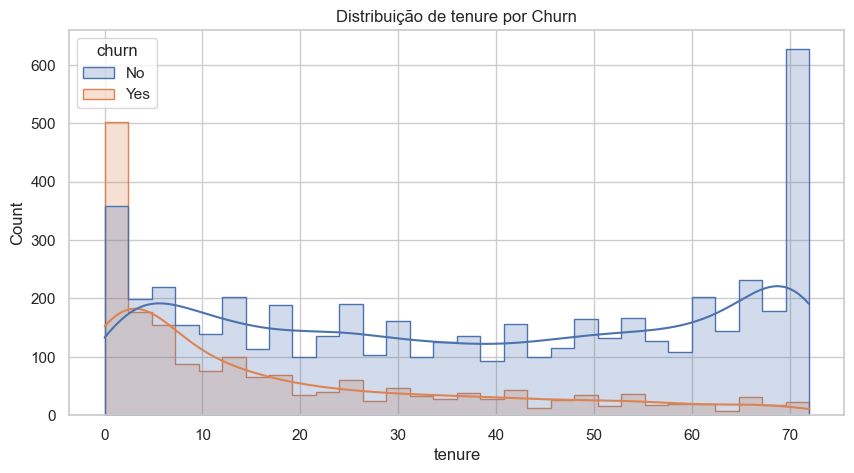

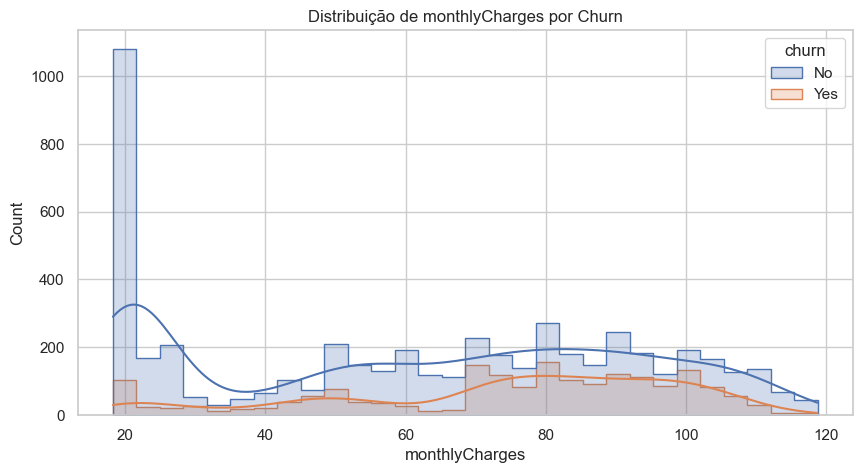

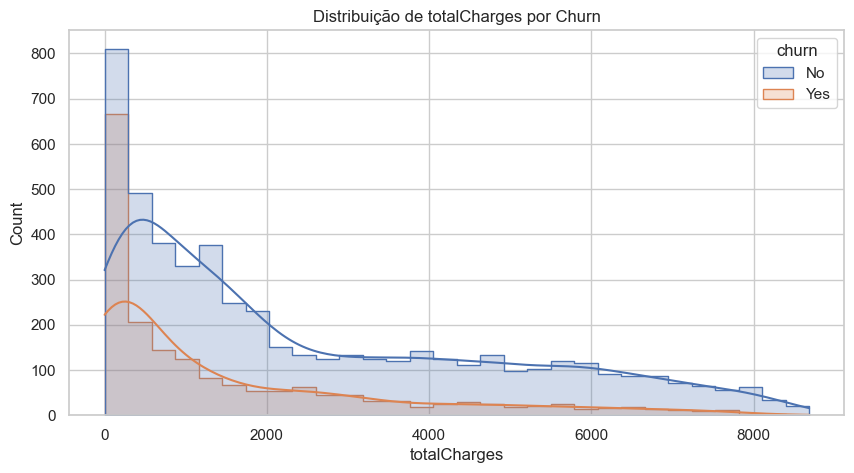

In [13]:
num_cols = ['tenure', 'monthlyCharges', 'totalCharges']

for col in num_cols:
    plt.figure()
    sns.histplot(data=dataSet, x=col, bins=30, kde=True, hue='churn', element='step')
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()

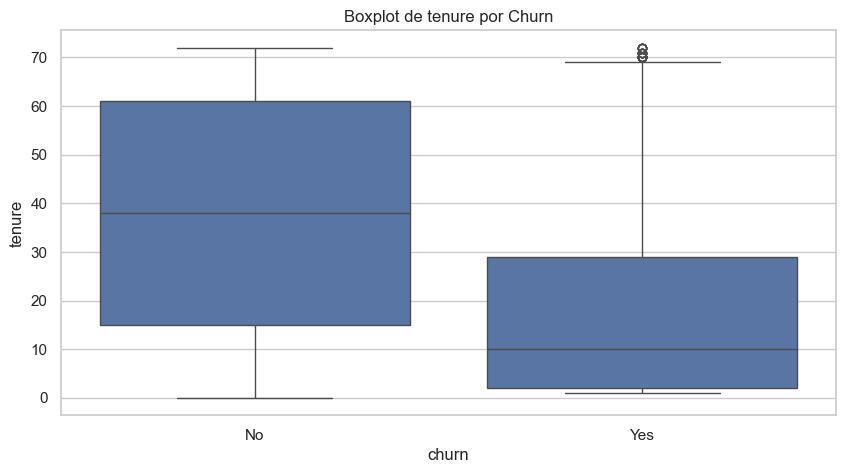

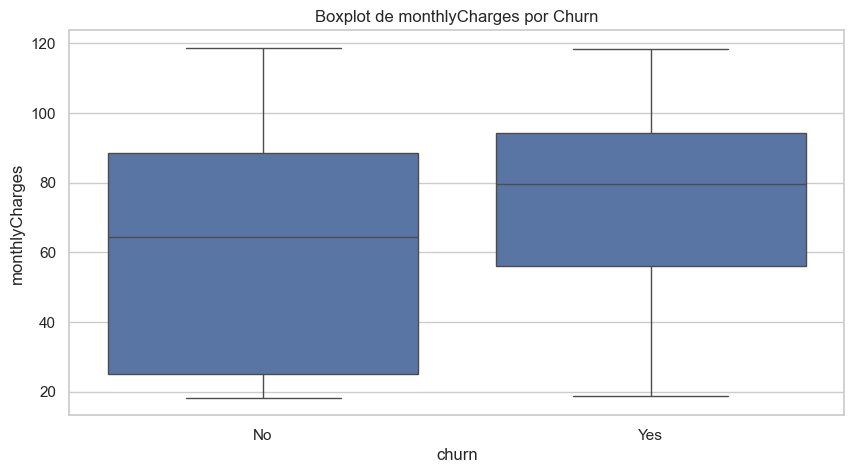

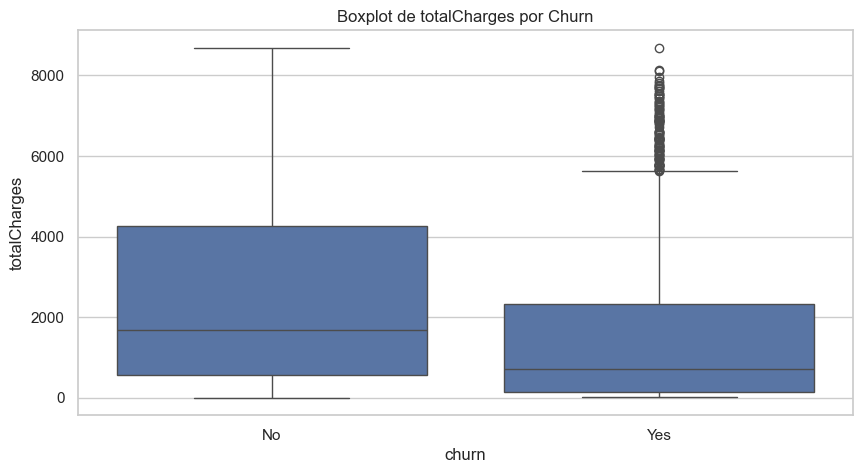

In [15]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=dataSet)
    plt.title(f'Boxplot de {col} por Churn')
    plt.show()

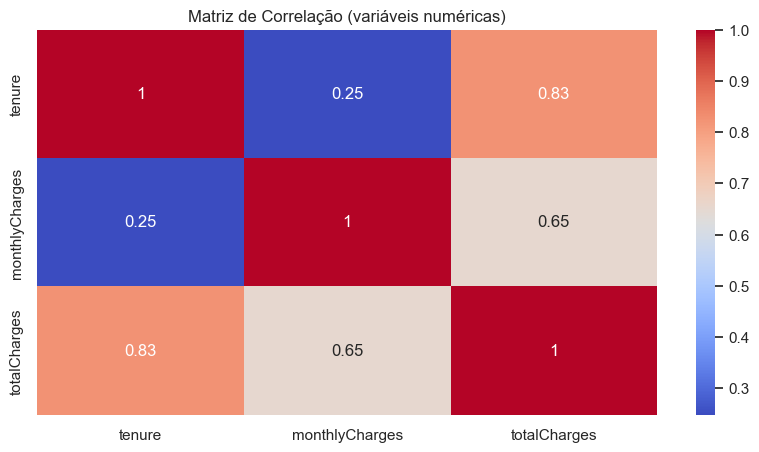

In [16]:
corr = dataSet[num_cols].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (variáveis numéricas)')
plt.show()

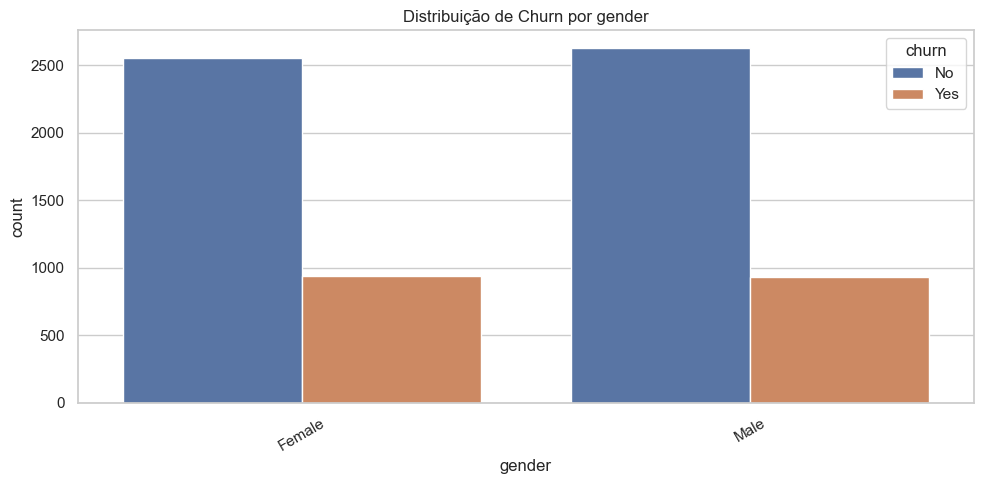

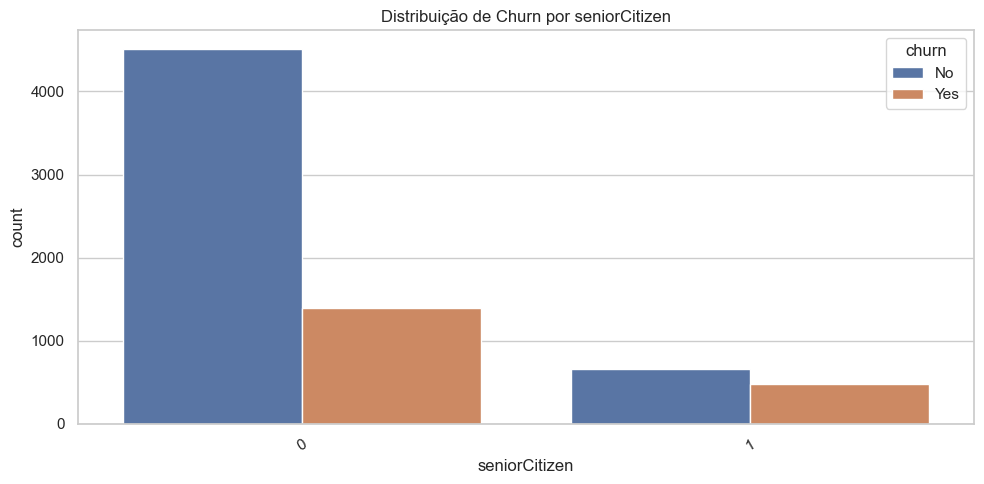

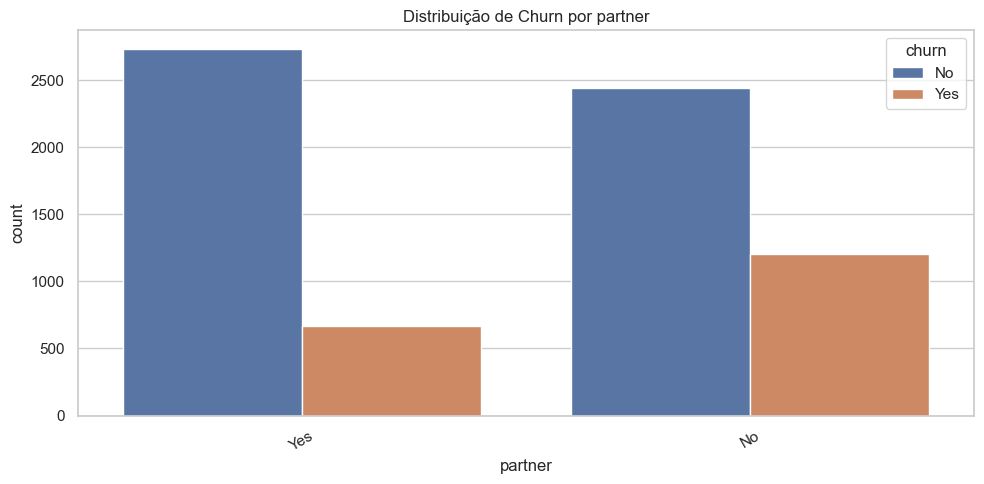

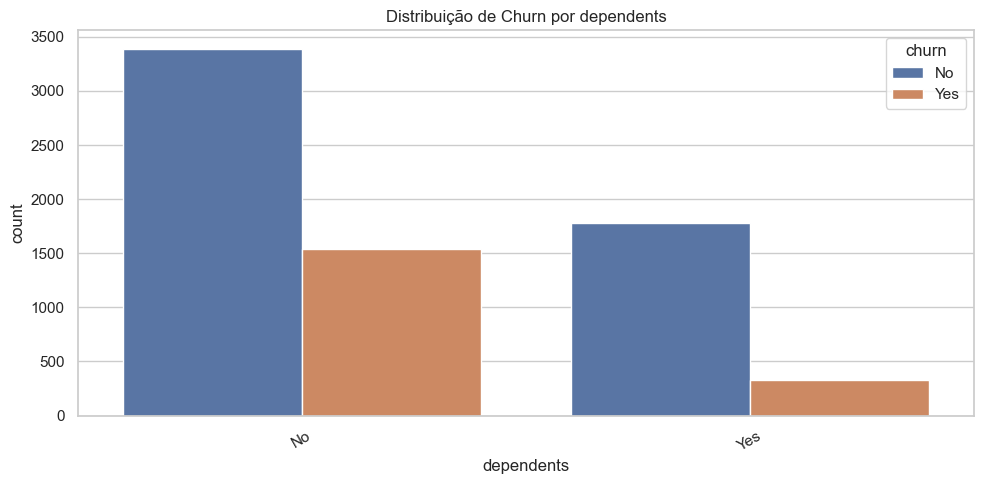

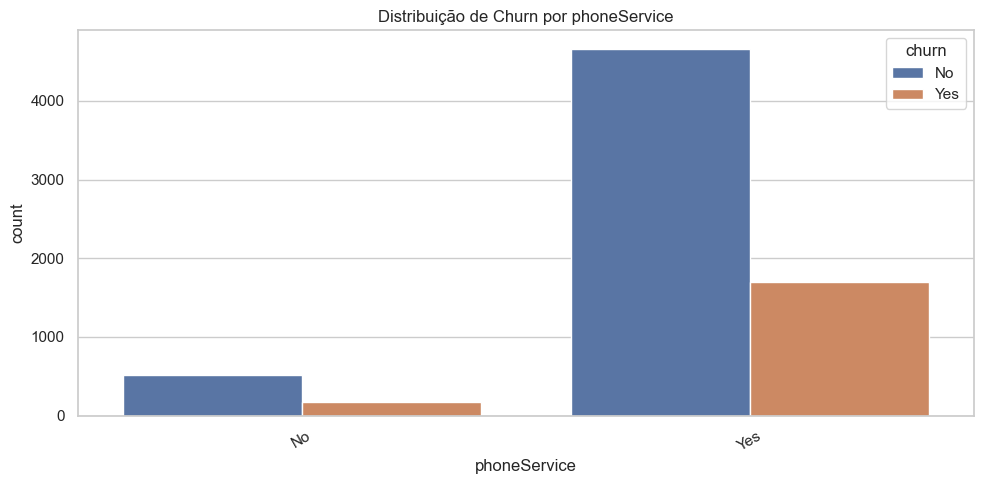

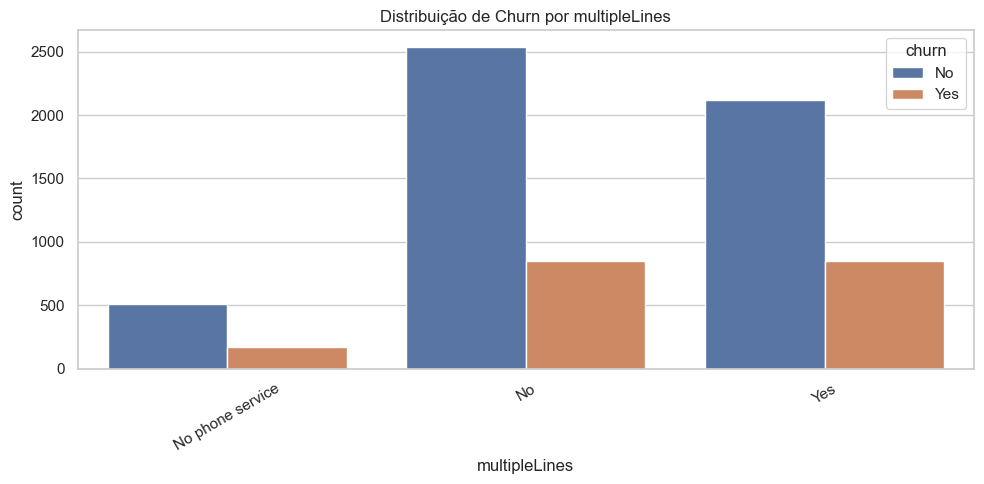

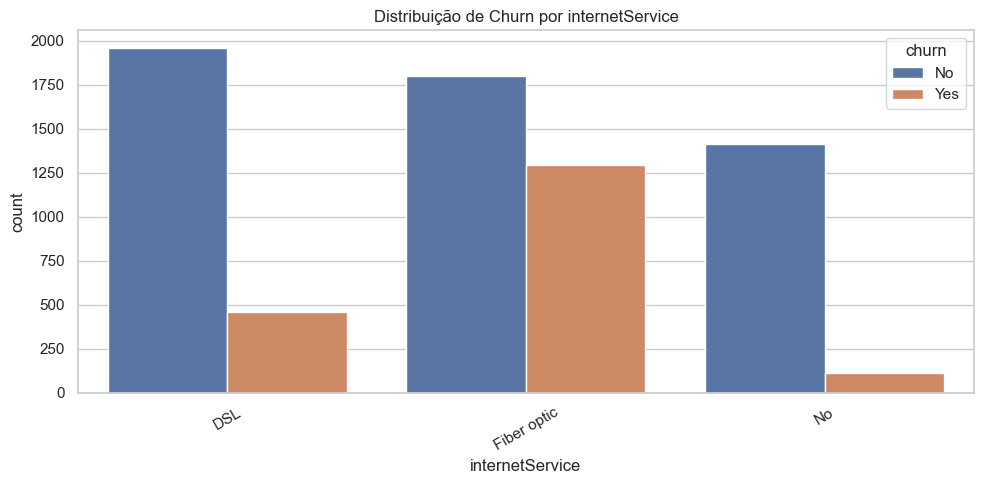

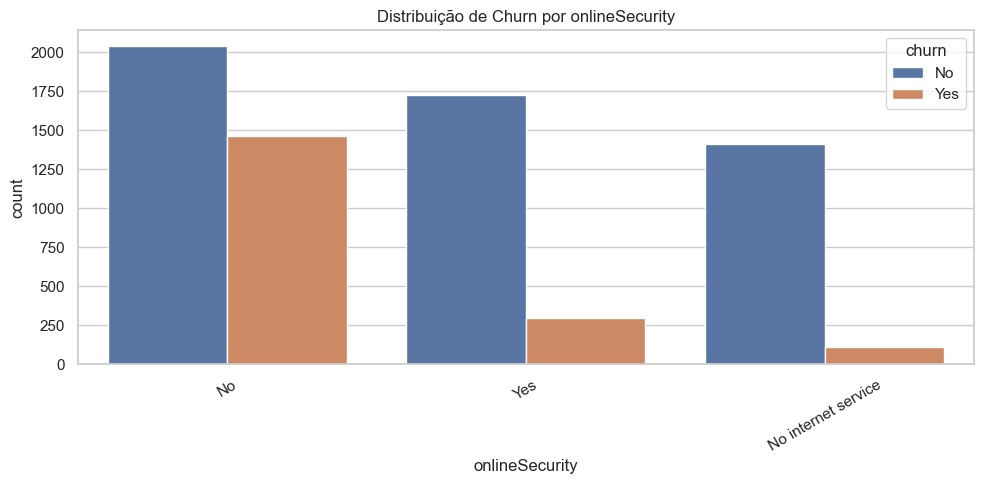

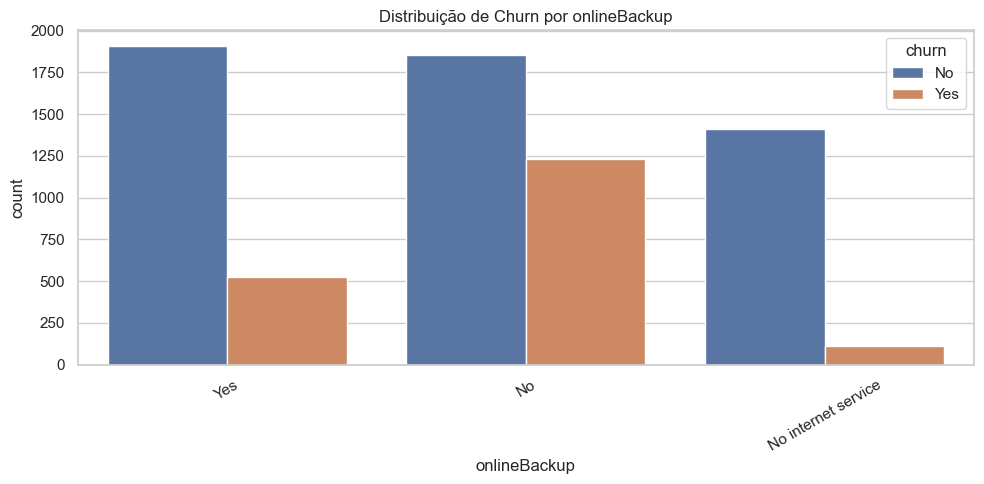

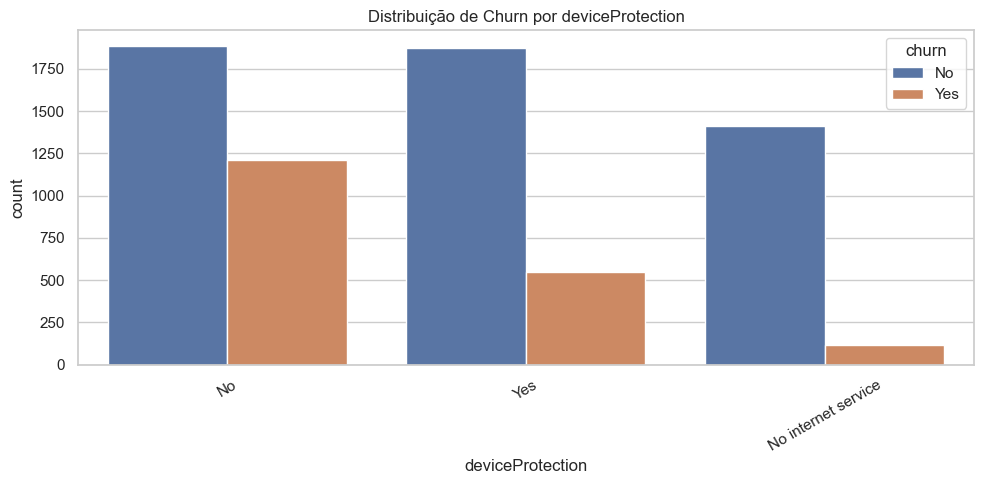

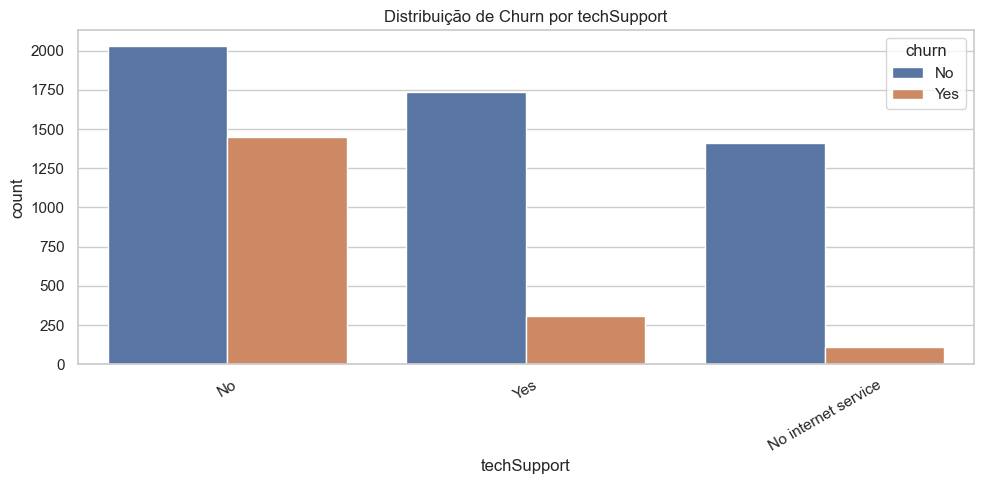

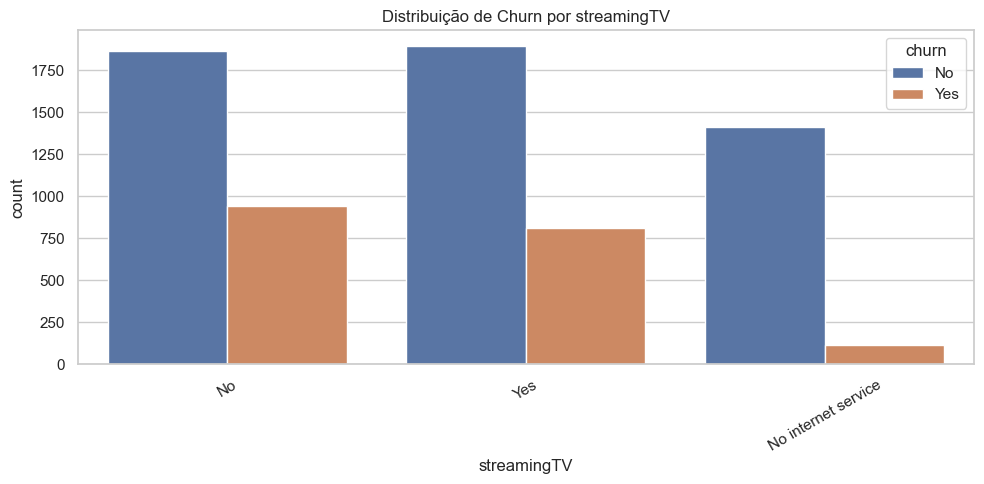

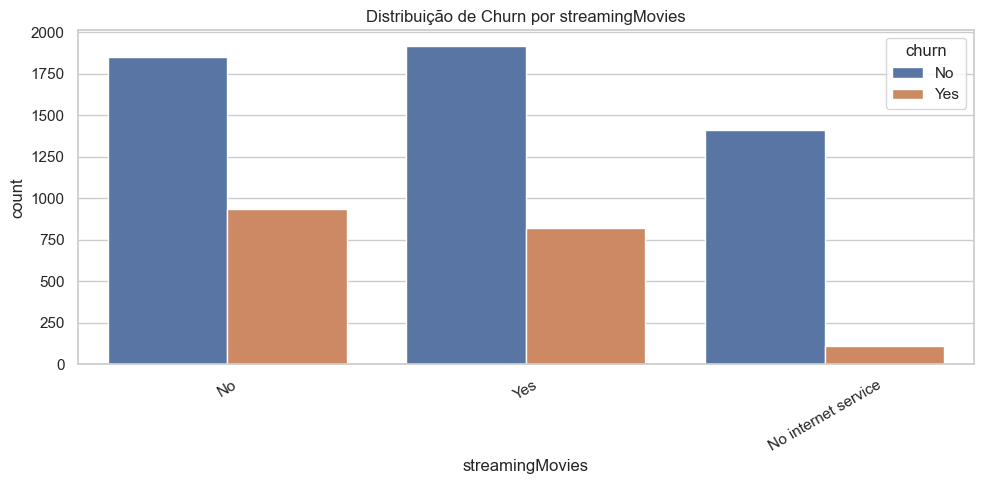

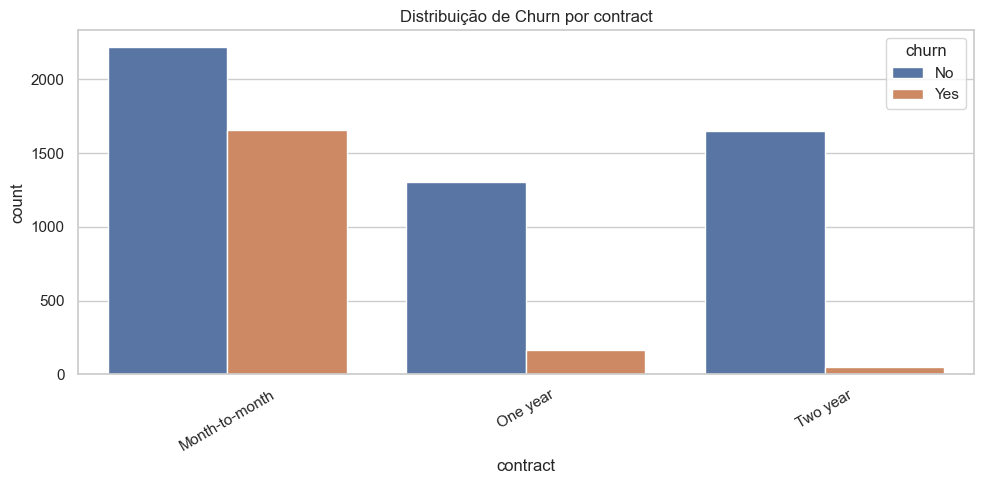

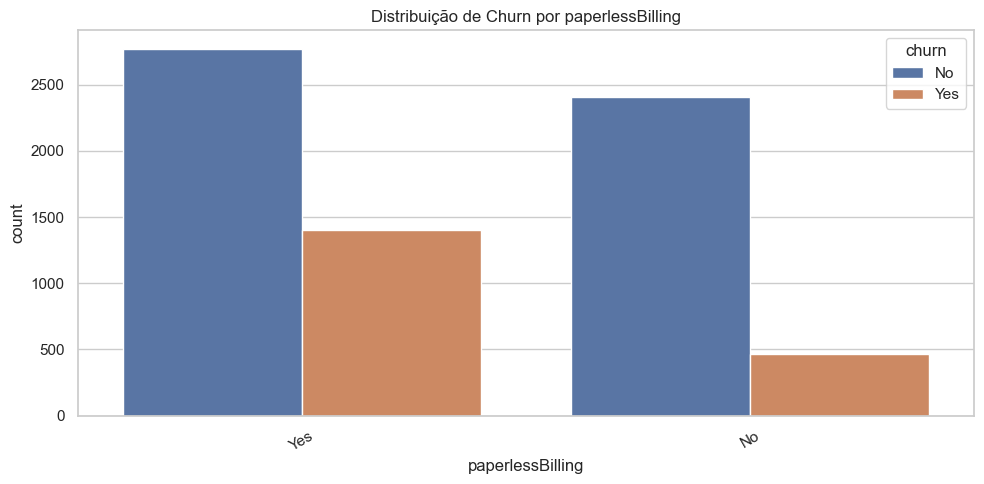

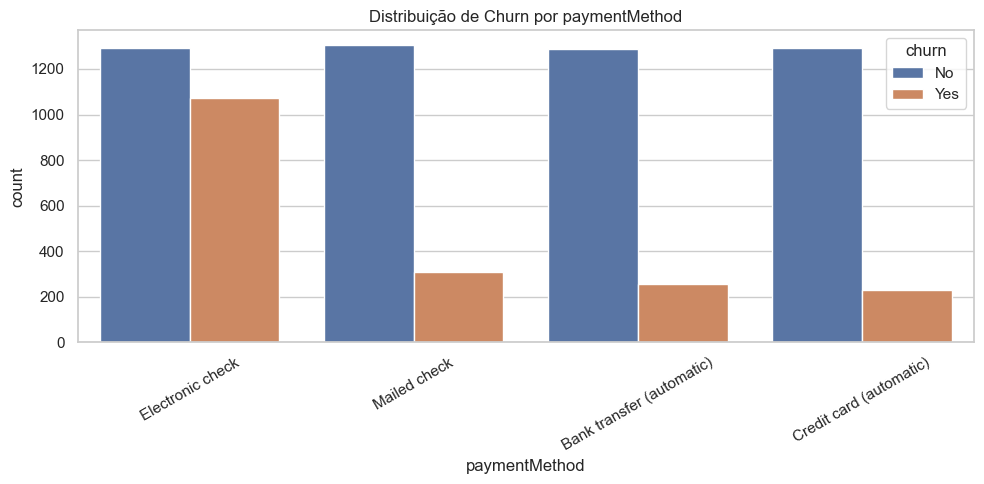

In [17]:
cat_cols = ['gender', 'seniorCitizen', 'partner', 'dependents',
            'phoneService', 'multipleLines', 'internetService',
            'onlineSecurity', 'onlineBackup', 'deviceProtection',
            'techSupport', 'streamingTV', 'streamingMovies',
            'contract', 'paperlessBilling', 'paymentMethod']

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='churn', data=dataSet)
    plt.title(f'Distribuição de Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [18]:
for col in cat_cols:
    churn_rate_by_group = dataSet.groupby(col)['churn'].value_counts(normalize=True).unstack().fillna(0)
    if 'Yes' in churn_rate_by_group.columns:
        churn_rate = churn_rate_by_group['Yes'].sort_values(ascending=False)
        print(f"\n📌 Taxa de churn por categoria: {col}")
        print(churn_rate.head())


📌 Taxa de churn por categoria: gender
gender
Female    0.269209
Male      0.261603
Name: Yes, dtype: float64

📌 Taxa de churn por categoria: seniorCitizen
seniorCitizen
1    0.416813
0    0.236062
Name: Yes, dtype: float64

📌 Taxa de churn por categoria: partner
partner
No     0.329580
Yes    0.196649
Name: Yes, dtype: float64

📌 Taxa de churn por categoria: dependents
dependents
No     0.312791
Yes    0.154502
Name: Yes, dtype: float64

📌 Taxa de churn por categoria: phoneService
phoneService
Yes    0.267096
No     0.249267
Name: Yes, dtype: float64

📌 Taxa de churn por categoria: multipleLines
multipleLines
Yes                 0.286099
No                  0.250442
No phone service    0.249267
Name: Yes, dtype: float64

📌 Taxa de churn por categoria: internetService
internetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Yes, dtype: float64

📌 Taxa de churn por categoria: onlineSecurity
onlineSecurity
No                     0.417667
Yes          